In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('Application_Data.csv')
df.head().style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

C:\Users\eraco\AppData\Local\Temp\ipykernel_9656\77506118.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.head().style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
5008806,M,1,1,0,112500,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2,59,4,0,30,1
5008808,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,5,1
5008809,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,5,1
5008810,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,27,1
5008811,F,0,1,0,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1,53,9,0,39,1


In [20]:
print('\033[93m\033[1m'+'.: Imported Dataset Info :.'+'\033[0m')
print('\033[93m*' * 28+'\033[0m')
print('Total Rows:'+'\033[93m\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[93m\033[1m', df.shape[1])
print('\033[0m\033[93m'+'*' * 28+'\033[0m')
print('\n')

# --- Print Dataset Detail ---
print('\033[93m\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('\033[0m\033[93m'+'*' * 22+'\033[0m')
df.info(memory_usage = False)

.: Imported Dataset Info :.
****************************
Total Rows: 25128
Total Columns: 21
****************************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone      

In [21]:
df.drop(columns=['Owned_Mobile_Phone'], inplace=True)

In [22]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

    print(df[col].unique())

['M' 'F']
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
['Security staff' 'Sales staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core staff' 'High skill tech staff' 'Cleaning staff'
 'Private service staff' 'Cooking staff' 'Low-skill Laborers'
 'Medicine staff' 'Secretaries' 'Waiters/barmen staff' 'HR staff'
 'Realty agents' 'IT staff']


In [23]:
df.isna().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

C:\Users\eraco\AppData\Local\Temp\ipykernel_9656\3380101846.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, linewidths=1, fmt='.2f', cmap='coolwarm')


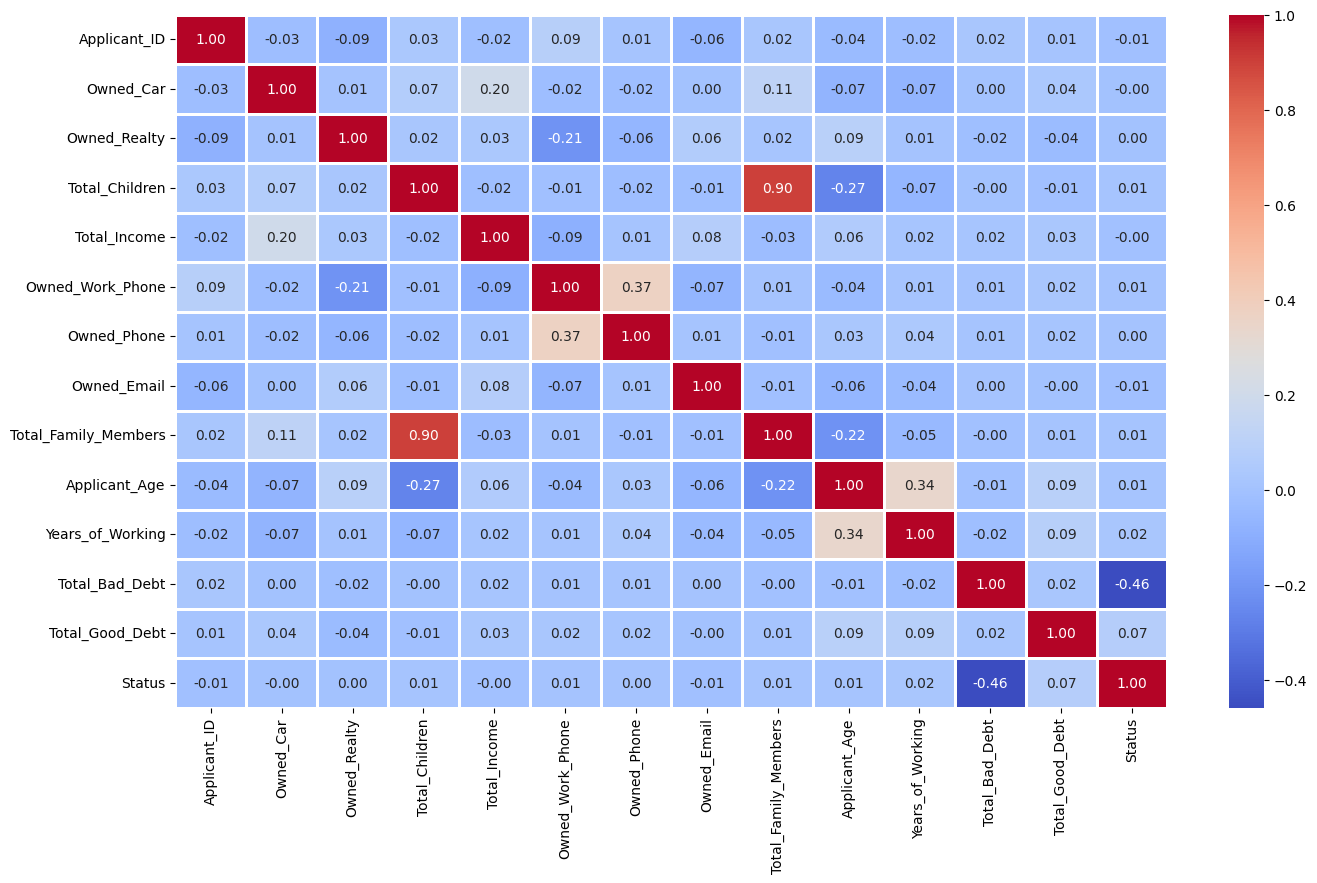

In [24]:
plt.figure(figsize=(16, 9))
sns.heatmap(data=df.corr(), annot=True, linewidths=1, fmt='.2f', cmap='coolwarm')
plt.show()

<Axes: xlabel='Status', ylabel='count'>

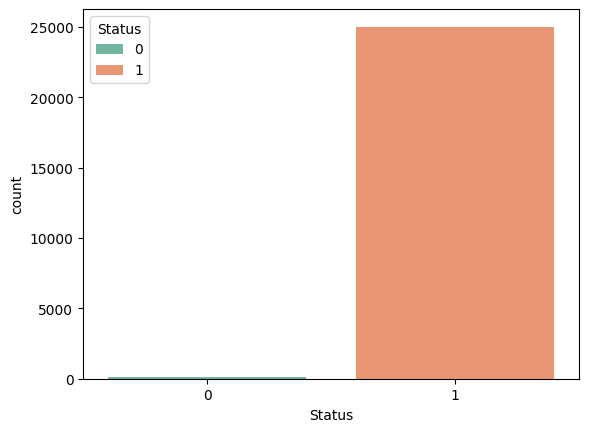

In [25]:
sns.countplot(x='Status', data=df, hue='Status', palette='Set2')

In [26]:
# --- Create Prediction & Modeling Data ---
df_modeling = df.sample(frac=0.9, random_state=42)
df_unseen = df.drop(df_modeling.index)
df_modeling.reset_index(inplace=True, drop=True)
df_unseen.reset_index(inplace=True, drop=True)

# --- Shape of Modeling & Prediction Data ---
print('\033[93m\033[1m'+'.: Data for Modeling :.'+'\033[0m')
print('\033[93m*' * 24+'\033[0m')
print('Total Observations / Total columns: ' + str(df_modeling.shape))
print('\n')
print('\033[93m\033[1m'+'.: Data for Predictions (Unseen) :.'+'\033[0m')
print('\033[93m*' * 36+'\033[0m')
print('Total Observations / Total Columns: ' + str(df_unseen.shape))

.: Data for Modeling :.
************************
Total Observations / Total columns: (22615, 20)


.: Data for Predictions (Unseen) :.
************************************
Total Observations / Total Columns: (2513, 20)


In [27]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace(' ', '_')

    print(col, df[col].unique())

Applicant_Gender ['M' 'F']
Income_Type ['Working' 'Commercial_associate' 'State_servant' 'Student' 'Pensioner']
Education_Type ['Secondary_/_secondary_special' 'Higher_education' 'Incomplete_higher'
 'Lower_secondary' 'Academic_degree']
Family_Status ['Married' 'Single_/_not_married' 'Civil_marriage' 'Separated' 'Widow']
Housing_Type ['House_/_apartment' 'Rented_apartment' 'Municipal_apartment'
 'With_parents' 'Co-op_apartment' 'Office_apartment']
Job_Title ['Security_staff' 'Sales_staff' 'Accountants' 'Laborers' 'Managers'
 'Drivers' 'Core_staff' 'High_skill_tech_staff' 'Cleaning_staff'
 'Private_service_staff' 'Cooking_staff' 'Low-skill_Laborers'
 'Medicine_staff' 'Secretaries' 'Waiters/barmen_staff' 'HR_staff'
 'Realty_agents' 'IT_staff']


In [28]:
target = 'Status'
categorical_features = ['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status', 'Housing_Type', 'Job_Title']
ignore_features = ['Applicant_ID']

X = df_modeling.drop(columns=[target] + ignore_features)
y = df_modeling[target]

numerical_features = [col for col in X.columns if col not in categorical_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [29]:
X_train.head()

,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt
7370,F,0,1,2,135000,Working,Secondary / secondary special,Separated,House / apartment,0,0,0,Core staff,3,41,7,3,13
7313,M,1,1,0,900000,Working,Higher education,Married,House / apartment,0,0,0,Drivers,2,53,4,0,46
10881,F,0,1,0,135000,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0,0,1,Cleaning staff,2,47,3,0,4
814,F,0,0,1,144000,Working,Secondary / secondary special,Single / not married,Rented apartment,1,1,0,High skill tech staff,2,40,10,0,33
15994,M,0,0,0,90000,Working,Secondary / secondary special,Widow,Municipal apartment,1,1,0,Sales staff,1,55,10,4,14


In [30]:
from sklearn.pipeline import Pipeline as SciPipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sampling_strategy = {
    0: 20000,
    1: 20000,
}

continuous_features = numerical_features

scaling_transformer = SciPipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    # ('scaler', StandardScaler()),
])

# preprocessor = ColumnTransformer(transformers=[
#     ('scaling_transformer', scaling_transformer, continuous_features),
# ], remainder='passthrough', )#force_int_remainder_cols=False

# pipeline = ImbPipeline([
#     ('preprocessor', preprocessor),
#     ('over', SMOTE(random_state=69, sampling_strategy=sampling_strategy)),
#     ('classifier', RandomForestClassifier(n_jobs=6, random_state=69)),
# ])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaling_transformer', scaling_transformer, continuous_features)
    ],
    remainder='passthrough'
)

smote = SMOTE(random_state=123)

# model = RandomForestClassifier(random_state=123, class_weight='balanced')  # Using class_weight as an alternative

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler for numeric features (optional)
    ('classifier', RandomForestClassifier(n_jobs=6, random_state=123))
])


param_grid = [
    {
        'classifier': [RandomForestClassifier(n_jobs=6, random_state=69)],
        'classifier__n_estimators': [50, 100],  # Added Random Forest classifier
        'classifier__max_depth': [10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    {
        'classifier': [XGBClassifier(n_jobs=6)],
        'classifier__max_depth': [3, 6, 9],
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.1, 0.01, 0.001],
    },
    {
        'classifier': [LGBMClassifier(n_jobs=6)],
        'classifier__num_leaves': [25, 50, 75],
        'classifier__n_estimators': [50, 100],
        'classifier__learning_rate': [0.1, 0.01, 0.001],
    },
]

In [31]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

kf = StratifiedKFold(n_splits=5, random_state=69, shuffle=True)

grid_search = GridSearchCV(pipeline, param_grid, scoring='f1', cv=kf, n_jobs=6, verbose=3)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
grid_search.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[LightGBM] [Info] Number of positive: 18004, number of negative: 18004
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11251
[LightGBM] [Info] Number of data points in the train set: 36008, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters found:  {'classifier': LGBMClassifier(n_jobs=6), 'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100, 'classifier__num_leaves': 25}


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Applicant_Gender',
                                                   'Income_Type',
                                                   'Education_Type',
                                                   'Family_Status',
                                                   'Housing_Type',
                                                   'Job_Title']),
                                                 ('scaling_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Owned_Car', 'Owned_Realty',
                                                   'Total_Children',
                                                   'Total_Income',
                                                   'Owned_Work_Phone',
                                                   'Owned_Phone', 'Owned_Email',
                                                   'Total_Family_Members',
                                                   'Applicant_Age',
                                                   'Years_of_Working',
                                                   'Total_Bad_Debt',
                                                   'Total_Good_Debt'])])),
                ('smote', SMOTE(random_state=123)),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier', LGBMClassifier(n_jobs=6, num_leaves=25))])

In [32]:

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
#     ],
#     remainder='passthrough'
# )

# smote = SMOTE(random_state=123)

# model = RandomForestClassifier(random_state=123, class_weight='balanced')  # Using class_weight as an alternative

# pipeline = ImbPipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('smote', smote),
#     ('scaler', StandardScaler(with_mean=False)),  # StandardScaler for numeric features (optional)
#     ('classifier', model)
# ])

# pipeline.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

score = grid_search.score(X_test, y_test)
print(f"Model Accuracy: {score}")
report = classification_report(y_test.values, y_pred)
print("Classification Report for df_unseen:")
print(report)

Model Accuracy: 0.999333777481679
Classification Report for df_unseen:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        18
           1       1.00      1.00      1.00      4505

    accuracy                           1.00      4523
   macro avg       0.89      0.97      0.92      4523
weighted avg       1.00      1.00      1.00      4523



Feature Importances:
                                         Feature  Importance
52                               Total_Good_Debt         810
51                                Total_Bad_Debt         785
50                              Years_of_Working         108
4                      Income_Type_State servant          84
12                  Family_Status_Civil marriage          83
25                       Job_Title_Cooking staff          69
49                                 Applicant_Age          58
11  Education_Type_Secondary / secondary special          52
3                          Income_Type_Pensioner          32
29               Job_Title_High skill tech staff          32
48                          Total_Family_Members          30
26                          Job_Title_Core staff          27
44                                  Total_Income          22
42                                  Owned_Realty          22
22                     Housing_Type_With parents          20
2  

<Figure size 1000x800 with 0 Axes>

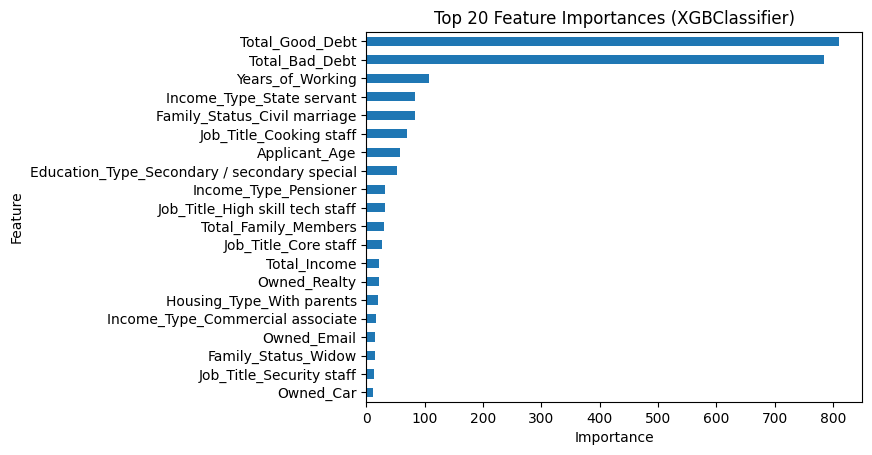

In [33]:
# Access the best estimator from the grid search
best_pipeline = grid_search.best_estimator_

# Extract the trained XGBClassifier from the pipeline
trained_model = best_pipeline.named_steps['classifier']

# Get the preprocessed feature names
ohe = best_pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine the one-hot encoded feature names with the remaining numeric columns
numeric_features = [col for col in X_train.columns if col not in categorical_features]
feature_names = np.concatenate([ohe_feature_names, numeric_features])

# Retrieve feature importances from the XGBClassifier
feature_importances = trained_model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
importance_df.head(20).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 20 Feature Importances (XGBClassifier)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


AUC Score for df_unseen: 1.00


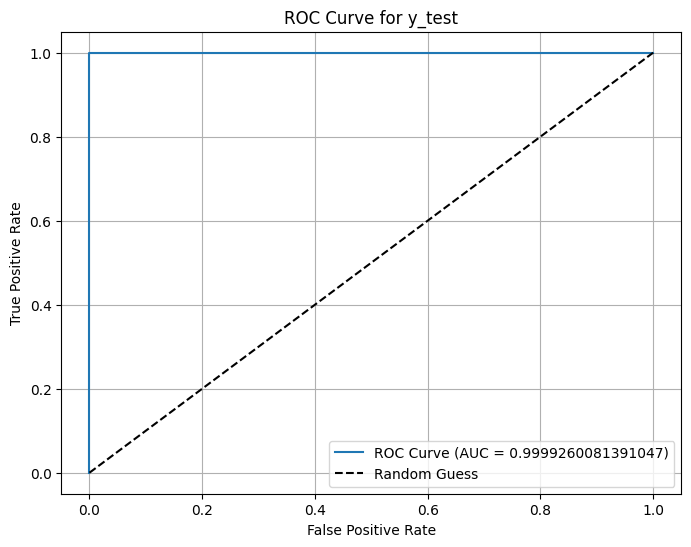

In [34]:


y_unseen_probs = grid_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_unseen_probs, pos_label=1)

auc_score = roc_auc_score(y_test, y_unseen_probs)
print(f"AUC Score for df_unseen: {auc_score:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for y_test')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Classification Report for df_unseen:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      1.00      1.00      2498

    accuracy                           1.00      2513
   macro avg       0.94      1.00      0.97      2513
weighted avg       1.00      1.00      1.00      2513



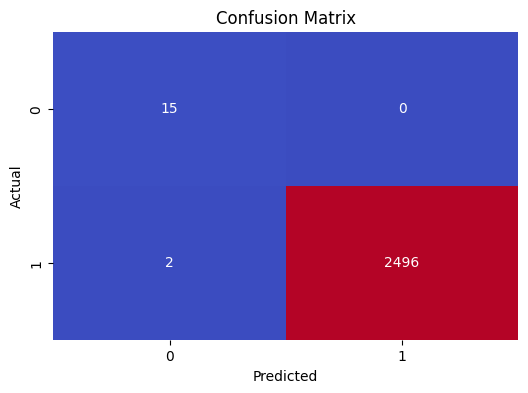

In [35]:
X_unseen = df_unseen.drop(columns=[target] + ignore_features)
y_unseen = df_unseen[target]

y_unseen_pred = grid_search.predict(X_unseen)

report = classification_report(y_unseen, y_unseen_pred)
print("Classification Report for df_unseen:")
print(report)

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_unseen, y_unseen_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

AUC Score for df_unseen: 1.00


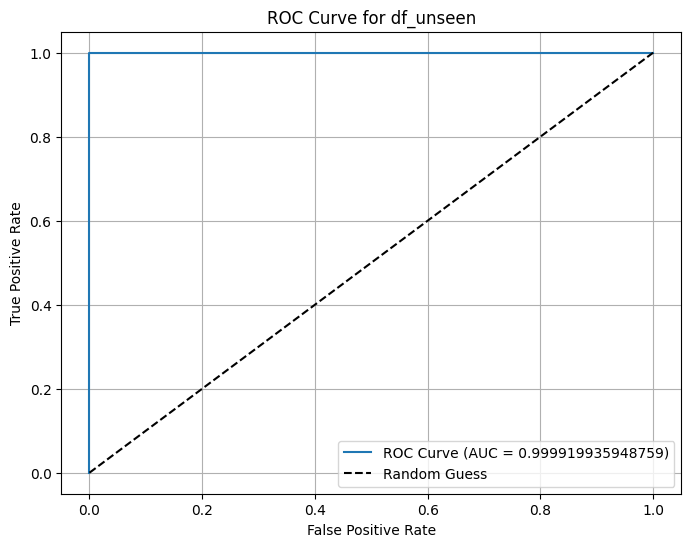

In [36]:


y_unseen_probs = grid_search.predict_proba(X_unseen)[:, 1]

fpr, tpr, thresholds = roc_curve(y_unseen, y_unseen_probs, pos_label=1)

auc_score = roc_auc_score(y_unseen, y_unseen_probs)
print(f"AUC Score for df_unseen: {auc_score:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for df_unseen')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Feature Importances:
                                         Feature  Importance
52                               Total_Good_Debt         810
51                                Total_Bad_Debt         785
50                              Years_of_Working         108
4                      Income_Type_State servant          84
12                  Family_Status_Civil marriage          83
25                       Job_Title_Cooking staff          69
49                                 Applicant_Age          58
11  Education_Type_Secondary / secondary special          52
3                          Income_Type_Pensioner          32
29               Job_Title_High skill tech staff          32
48                          Total_Family_Members          30
26                          Job_Title_Core staff          27
44                                  Total_Income          22
42                                  Owned_Realty          22
22                     Housing_Type_With parents          20
2  

<Figure size 1000x800 with 0 Axes>

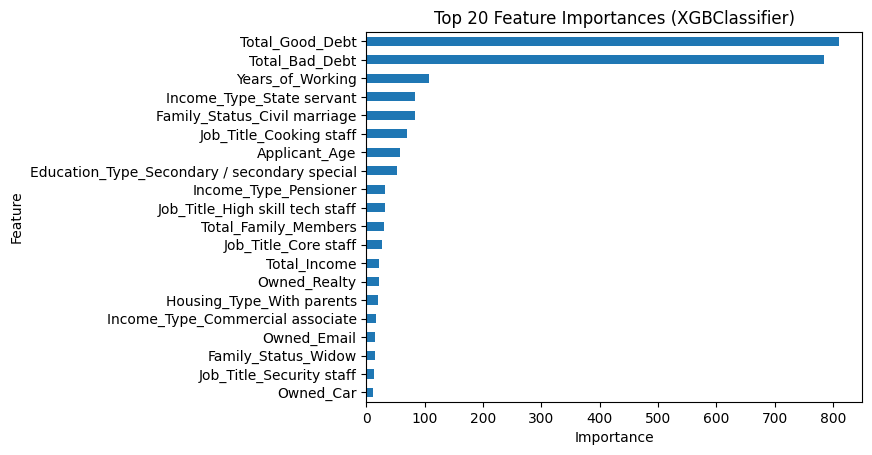

In [37]:
# Access the best estimator from the grid search
best_pipeline = grid_search.best_estimator_

# Extract the trained XGBClassifier from the pipeline
trained_model = best_pipeline.named_steps['classifier']

# Get the preprocessed feature names
ohe = best_pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine the one-hot encoded feature names with the remaining numeric columns
numeric_features = [col for col in X_train.columns if col not in categorical_features]
feature_names = np.concatenate([ohe_feature_names, numeric_features])

# Retrieve feature importances from the XGBClassifier
feature_importances = trained_model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
importance_df.head(20).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 20 Feature Importances (XGBClassifier)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()


In [40]:
import joblib

joblib.dump(best_pipeline, "best_model_pipeline.joblib")
trained_model = best_pipeline.named_steps['classifier']
joblib.dump(trained_model, "trained_xgb_model.joblib")

['trained_xgb_model.joblib']

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

smote = SMOTE(random_state=123)

model = RandomForestClassifier(random_state=123, class_weight='balanced')  # Using class_weight as an alternative

pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('scaler', StandardScaler(with_mean=False)),  # StandardScaler for numeric features (optional)
    ('classifier', model)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

score = pipeline.score(X_test, y_test)
print(f"Model Accuracy: {score}")
report = classification_report(y_test.values, y_pred)
print("Classification Report for df_unseen:")
print(report)

Model Accuracy: 0.9975679858500995
Classification Report for df_unseen:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        18
           1       1.00      1.00      1.00      4505

    accuracy                           1.00      4523
   macro avg       1.00      0.69      0.78      4523
weighted avg       1.00      1.00      1.00      4523



AUC Score for df_unseen: 1.00


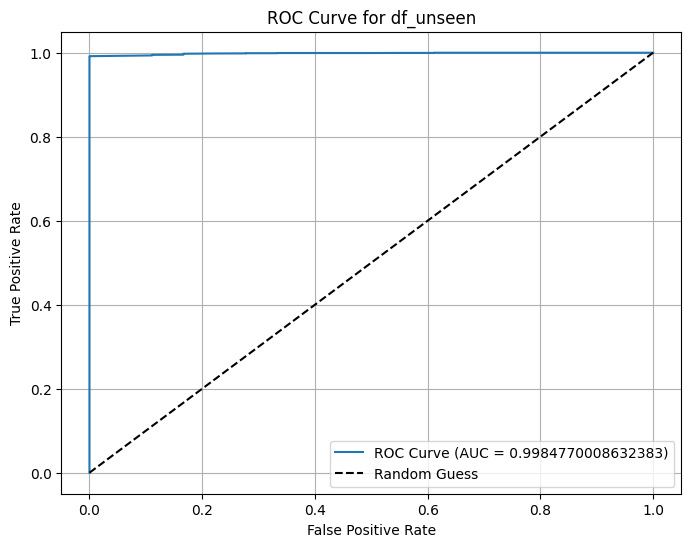

In [50]:


y_unseen_probs = pipeline.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_unseen_probs, pos_label=1)

auc_score = roc_auc_score(y_test, y_unseen_probs)
print(f"AUC Score for df_unseen: {auc_score:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for df_unseen')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [51]:
X_unseen = df_unseen.drop(columns=[target] + ignore_features)
y_unseen = df_unseen[target]

y_unseen_pred = pipeline.predict(X_unseen)

report = classification_report(y_unseen, y_unseen_pred)
print("Classification Report for df_unseen:")
print(report)

Classification Report for df_unseen:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       1.00      1.00      1.00      2498

    accuracy                           1.00      2513
   macro avg       1.00      0.73      0.82      2513
weighted avg       1.00      1.00      1.00      2513



Feature Importances:
                                              Feature  Importance
57                                     Total_Bad_Debt    0.401733
58                                    Total_Good_Debt    0.132842
42  Job_Title_Laborers                            ...    0.035657
10  Income_Type_Working                           ...    0.033941
1                            Applicant_Gender_M          0.032165
0                            Applicant_Gender_F          0.030266
17  Family_Status_Married                         ...    0.025226
2                                         Owned_Car_0    0.024699
52                                     Total_Children    0.022383
54                               Total_Family_Members    0.020484
6   Income_Type_Commercial associate              ...    0.020213
33                                      Owned_Email_1    0.018577
53                                       Total_Income    0.018474
3                                         Owned_Car_1  

<Figure size 1000x800 with 0 Axes>

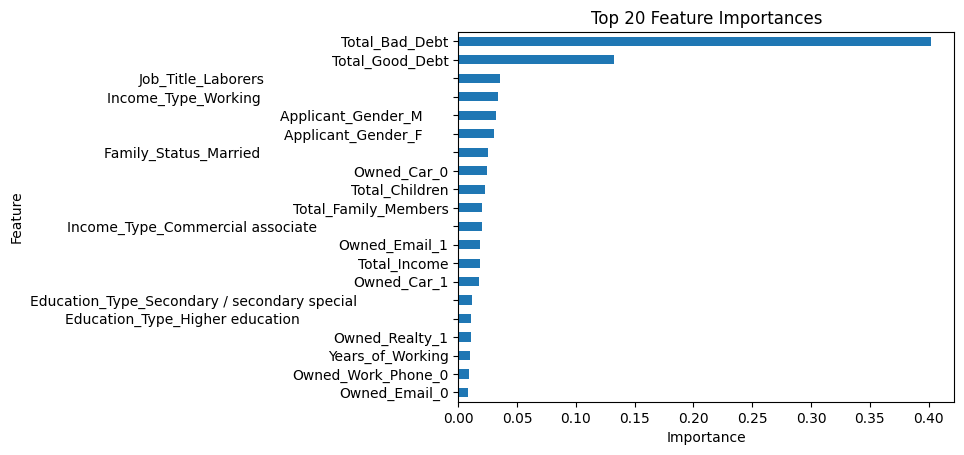

In [52]:
trained_model = pipeline.named_steps['classifier']

ohe = pipeline.named_steps['preprocessor'].named_transformers_['cat']
ohe_feature_names = ohe.get_feature_names_out(categorical_features)

# Combine the one-hot encoded feature names with the remaining numeric columns
numeric_features = [col for col in X.columns if col not in categorical_features]
feature_names = np.concatenate([ohe_feature_names, numeric_features])

# Retrieve feature importances from the model
feature_importances = trained_model.feature_importances_

# Create a DataFrame for better readability
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Feature Importances:")
print(importance_df)

# Optional: Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
importance_df.head(20).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.show()

In [61]:
sampling_strategy = {
    0: 20000,
    1: 20000,
}

continuous_features = numerical_features

scaling_transformer = SciPipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    # ('scaler', StandardScaler()),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('scaling_transformer', scaling_transformer, continuous_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)

cat_features_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
passthrough_features = continuous_features

all_feature_names = np.concatenate([cat_features_encoded, passthrough_features])

X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)

X_train_preprocessed_df['Status'] = y_train.reset_index(drop=True)

df_no_approval_preprocessed = X_train_preprocessed_df[X_train_preprocessed_df['Status'] == 0]

output_path = "base_preprocessed.csv"
df_no_approval_preprocessed.to_csv(output_path, index=False)

In [57]:
df_no_approval = df[df['Status'] == 0]

output_path = "base_no_approval.csv"
df_no_approval.to_csv(output_path, index=False)

# Print confirmation
print(f"Filtered data saved to {output_path}")

Filtered data saved to base_no_approval.csv
